In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])


In [2]:
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [4]:
X = data.values[:, :2].T
y = data.values[:, 2:].T


Text(0, 0.5, 'Exam 2')

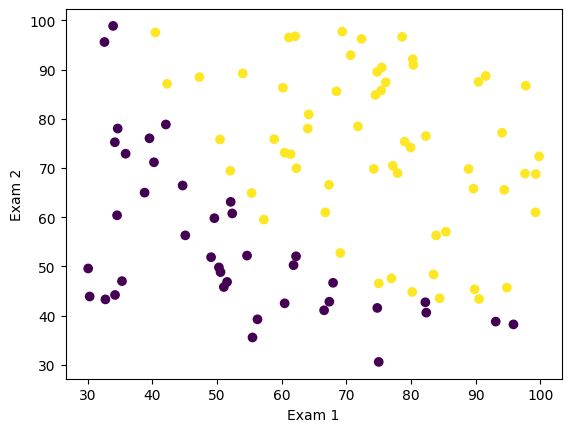

In [5]:
plt.scatter(X[0], X[1], c=y)
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')


In [6]:
theta = np.zeros((X.shape[0]+1, 1))

In [7]:
X = np.concatenate([np.ones([1, X.shape[1]]), X])

In [8]:
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

In [9]:
def sig(t):
    return 1/(1+np.exp(-t))

Text(0.5, 1.0, 'Sigmoid function')

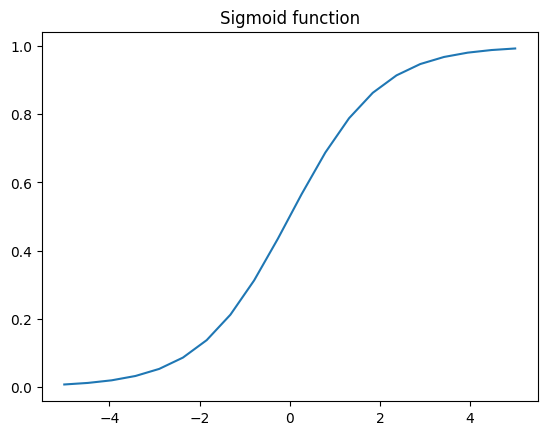

In [10]:
_ = np.linspace(-5, 5, 20)
plt.plot(_, sig(_))
plt.title('Sigmoid function')

In [11]:
def h(X, theta):
    return sig(theta.T@X)


In [12]:
def cost(theta, X, y):
    return (-y*np.log(h(X, theta))-(1-y)*np.log(1-h(X, theta)))


In [13]:
theta = np.zeros((X.shape[0], 1))
print(cost(theta, X, y)[0][-1])


0.6931471805599453


In [14]:
def simple_gradient(X, y, theta, alpha=1, it=500):
    cost_ = []
    theta_ = theta[::]
    for i in range(it):
        theta_ -= (alpha*(h(X, theta)-y)@X.T).T/X.shape[1]
        cost_.append(cost(theta_, X, y))

    return theta, cost_

In [15]:
theta, cost_ = simple_gradient(X, y, theta)
print(theta)
print(min(cost_[0][0]))

[[1.6860838 ]
 [3.92373195]
 [3.65831667]]
0.35735605244642626


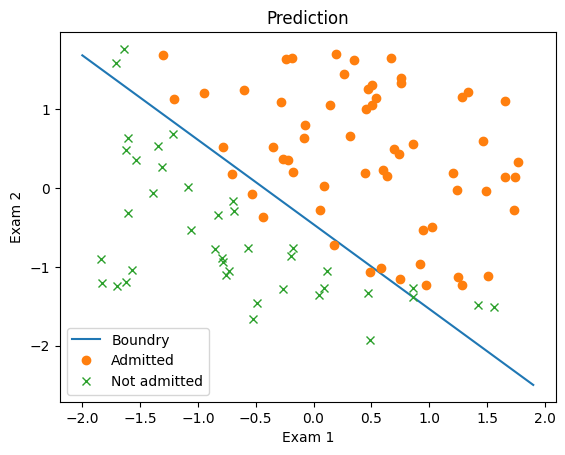

In [16]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure()
plt.plot(x1, x2, label='Boundry')
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'o', label='Admitted')
plt.plot(X1_0, X2_0, 'x', label='Not admitted')
plt.title('Prediction')
plt.ylabel('Exam 2')
plt.xlabel('Exam 1')
plt.legend()
plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target
Y_ = Y.copy()


In [15]:
clf = LogisticRegression(random_state=0).fit(X, Y)


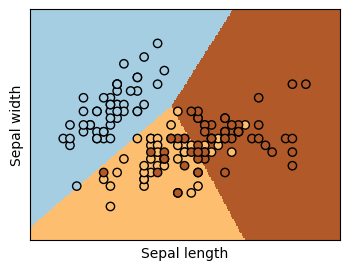

In [16]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
ZZ = clf.predict(X)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


Text(0.5, 1.0, 'Probability of 3rd class')

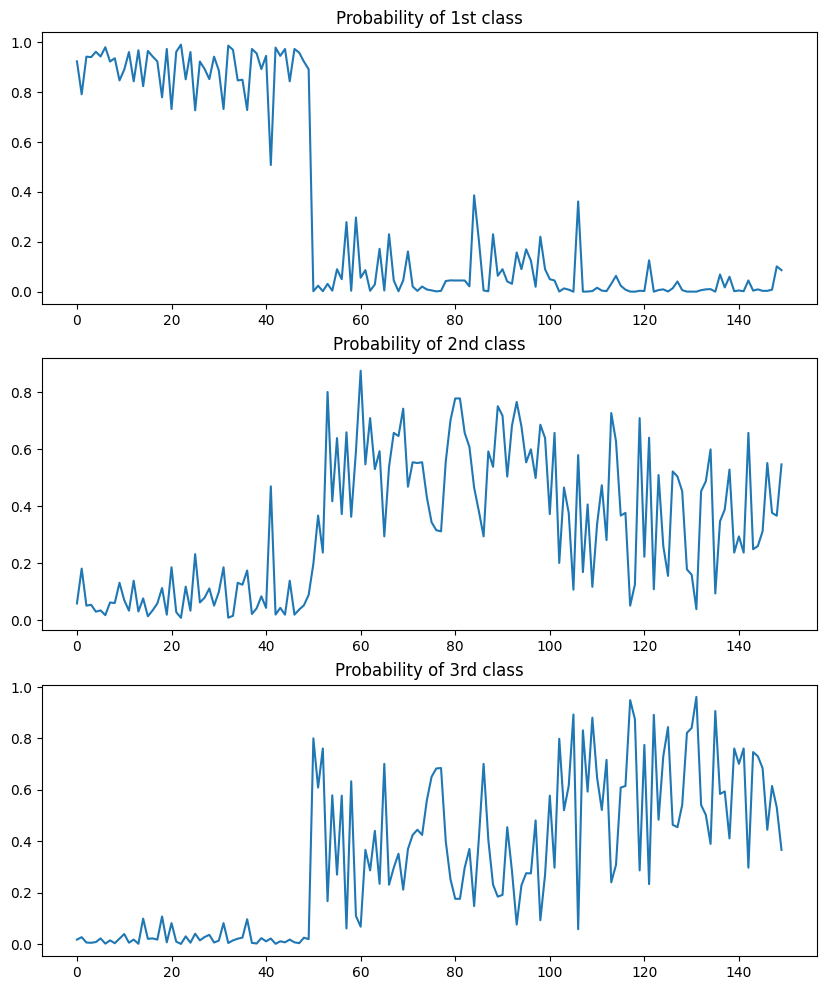

In [17]:
proba = clf.predict_proba(X)
fig = plt.figure(figsize=(10, 12))
(ax1, ax2, ax3) = fig.subplots(3, 1)
ax1.plot(proba[:, 0])
ax1.set_title('Probability of 1st class')
ax2.plot(proba[:, 1])
ax2.set_title('Probability of 2nd class')
ax3.plot(proba[:, 2])
ax3.set_title('Probability of 3rd class')


Text(0.5, 1.0, 'Class probability')

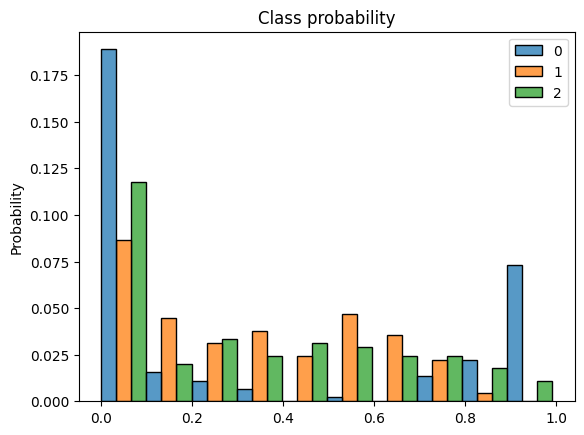

In [18]:
import seaborn as sns
sns.histplot(data=clf.predict_proba(X), multiple='dodge', stat='probability')
plt.title('Class probability')

In [23]:
from sklearn.metrics import explained_variance_score, r2_score
clf.score(X, Y)

0.82

In [20]:
r2_score(Y, ZZ)


0.73

In [24]:
explained_variance_score(Y, ZZ)


0.7300666666666666